# 1. Building a CNN model from scratch and to get to ~97% Accuracy

To train a neural network, handle the images in equal proportions or uniform size. We will choose 100x100 pixels for this. Import Tensorflow for model building and Keras API.  

In [1]:
# importing libraries
import tensorflow as tf
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import keras

img_width, img_height = 100, 100
train_data_dir = 'code/dataset/Train'
validation_data_dir = 'code/dataset/Test'
nb_train_samples = 4255
nb_validation_samples = 1011
epochs = 50
batch_size = 16

input_shape = (img_width, img_height, 3)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

"""
Data preprocessing - Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 tensors, 
and feed them (with their labels) to the model. These generators will yield batches of images of size 100x100 and their labels (categorical)
"""
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

"""
Training - Now we will train on 4,245 images available, for 50 epochs, and monitor the accuracy as well as on the 1,011 images in the 
validation set. The output for the model training are Loss, Accuracy, Validation Loss and Validation Accuracy. 
"""
history = model.fit(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)



c:\Users\Shashwat\pyTensorCodes\tensor\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,075 (652.64 KB)

 Trainable params: 167,075 (652.64 KB)

 Non-trainable params: 0 (0.00 B)

Found 3530 images belonging to 3 classes.
Found 1011 images belonging to 3 classes.


c:\Users\Shashwat\pyTensorCodes\tensor\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
221/265 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4976 - loss: 0.9416

c:\Users\Shashwat\pyTensorCodes\tensor\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
c:\Users\Shashwat\pyTensorCodes\tensor\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


265/265 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.5169 - loss: 0.9167 - val_accuracy: 0.6260 - val_loss: 0.7277
Epoch 2/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 17s 64ms/step - accuracy: 0.7430 - loss: 0.5878 - val_accuracy: 0.6181 - val_loss: 1.0344
Epoch 3/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.7924 - loss: 0.4694 - val_accuracy: 0.7728 - val_loss: 0.6379
Epoch 4/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.8347 - loss: 0.4033 - val_accuracy: 0.7798 - val_loss: 0.5990
Epoch 5/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.8739 - loss: 0.3214 - val_accuracy: 0.8363 - val_loss: 0.4200
Epoch 6/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 23s 86ms/step - accuracy: 0.8978 - loss: 0.2682 - val_accuracy: 0.7738 - val_loss: 0.6438
Epoch 7/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9058 - loss: 0.2433 - val_accuracy: 0.7490 - val_loss: 0.7076
Epoch 8/50
265/265 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - accuracy: 0.9148 - loss: 0.2135 - val_accurac

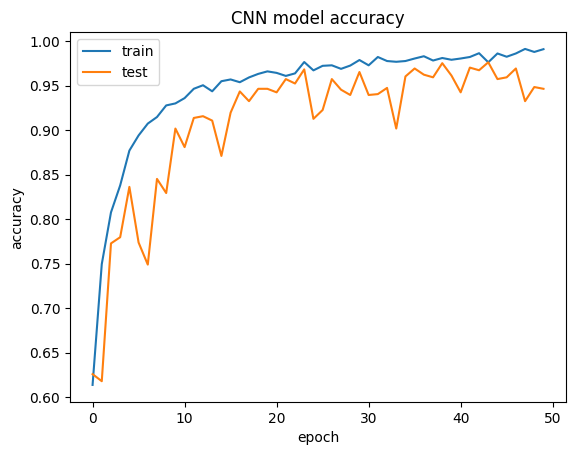

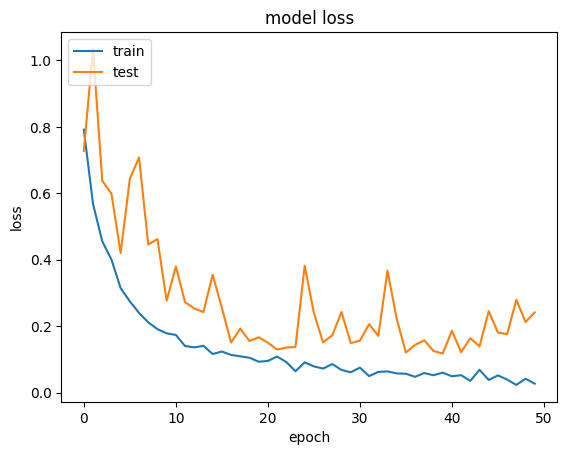

In [2]:
model.save_weights('model_cnn.weights.h5')

""" 
Model Prediction - We will plot the training/validation accuracy and loss as collected during training
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy_CNN')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()

# The classification report visualizer displays the precision, recall, F1, and support scores for the model

## There are four ways to check if the predictions are right or wrong:
TN / True Negative:
The case was negative and predicted negative

TP / True Positive: 
The case was positive and predicted positive

FN / False Negative: 
The case was positive but predicted negative

FP / False Positive: 
The case was negative but predicted positive

## Precision — What percent of predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.

Precision = TP/(TP + FP)

## Recall — What percent of the positive cases did model catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

## F1 score — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

## Support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Confusion Matrix
[[258  36   6]
 [  0 304   2]
 [  6   4 395]]
Classification Report
              precision    recall  f1-score   support

      glioma       0.98      0.86      0.91       300
  meningioma       0.88      0.99      0.94       306
     notumor       0.98      0.98      0.98       405

    accuracy                           0.95      1011
   macro avg       0.95      0.94      0.94      1011
weighted avg       0.95      0.95      0.95      1011



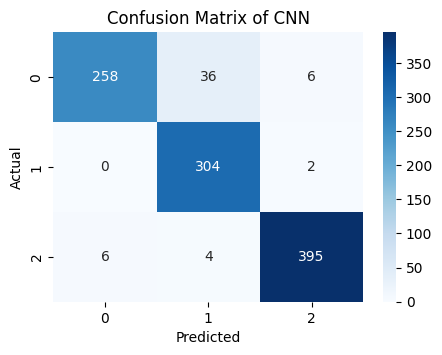

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of CNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_CNN.png')

# Show the plot
plt.show()

# 2. Building xception model and to get to ~99.3% Accuracy

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 22041387 (84.08 MB)
Trainable params: 21986859 (83.87 MB)
Non-trainable params: 54528 (213.00 KB)
_________

<ipython-input-8-ea7ed5339c3c>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


265/265 [==============================] - 60s 122ms/step - loss: 0.6623 - accuracy: 0.7056 - val_loss: 1.5341 - val_accuracy: 0.7034
Epoch 2/50
265/265 [==============================] - 31s 115ms/step - loss: 0.3615 - accuracy: 0.8891 - val_loss: 0.5949 - val_accuracy: 0.7778
Epoch 3/50
265/265 [==============================] - 31s 118ms/step - loss: 0.2140 - accuracy: 0.9288 - val_loss: 0.2496 - val_accuracy: 0.9335
Epoch 4/50
265/265 [==============================] - 31s 115ms/step - loss: 0.1931 - accuracy: 0.9406 - val_loss: 1.5273 - val_accuracy: 0.8363
Epoch 5/50
265/265 [==============================] - 31s 118ms/step - loss: 0.1527 - accuracy: 0.9580 - val_loss: 0.1527 - val_accuracy: 0.9444
Epoch 6/50
265/265 [==============================] - 32s 119ms/step - loss: 0.1167 - accuracy: 0.9639 - val_loss: 1.3810 - val_accuracy: 0.7877
Epoch 7/50
265/265 [==============================] - 32s 120ms/step - loss: 0.1223 - accuracy: 0.9625 - val_loss: 1.1013 - val_accuracy: 0.7

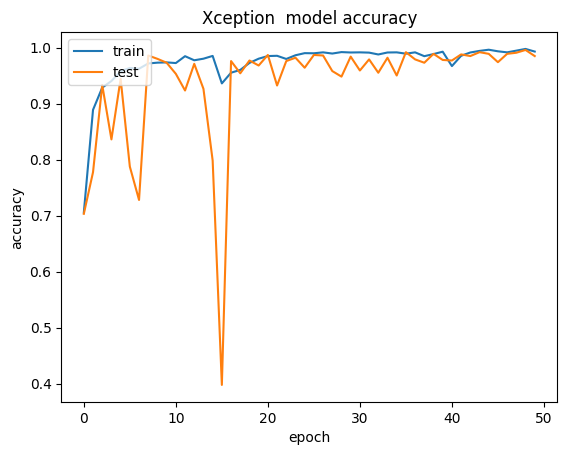

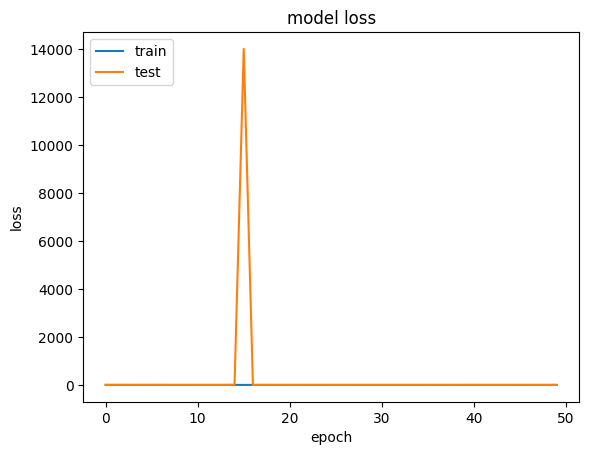

1779.8329193592072


In [ ]:
# importing libraries
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.models.sequential import Sequential
from keras.src.applications import Xception
from keras.src.layers.regularization.dropout import Dropout
from keras.src.layers.reshaping.flatten import Flatten
from keras.src.layers.core.dense import Dense
from matplotlib import pyplot as plt
import time

start = time.time()
# Use Xception as the base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])

"""
Data preprocessing - Next step is to set up the data generators that will read pictures in the source folder, convert them to float32 
tensors, and feed them (with their labels) to the model. These generators will yield batches of images of size 100x100 and 
their labels (categorical)
"""
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

"""
Training
"""
history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_xcpetion.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Xception  model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-9-b13177245ef6>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[287  13   0]
 [  0 306   0]
 [  0   2 403]]
Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.96      0.98       300
  meningioma       0.95      1.00      0.98       306
     notumor       1.00      1.00      1.00       405

    accuracy                           0.99      1011
   macro avg       0.98      0.98      0.98      1011
weighted avg       0.99      0.99      0.99      1011



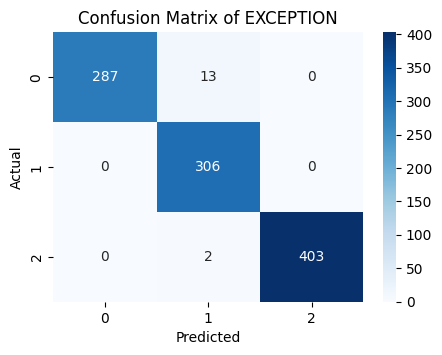

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of EXCEPTION')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_EXCEPTION.png')

# Show the plot
plt.show()

# 3. Building Iception model and to get to ~99.8% Accuracy

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 21934115 (83.67 MB)
Trainable params: 21899683 (83.54 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________
Found 42

<ipython-input-2-68bad608ff38>:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
132/132 [==============================] - 71s 269ms/step - loss: 0.6278 - accuracy: 0.7331 - val_loss: 0.4778 - val_accuracy: 0.8135
Epoch 2/50
132/132 [==============================] - 30s 225ms/step - loss: 0.2810 - accuracy: 0.8913 - val_loss: 0.2517 - val_accuracy: 0.9173
Epoch 3/50
132/132 [==============================] - 28s 214ms/step - loss: 0.1969 - accuracy: 0.9294 - val_loss: 0.1628 - val_accuracy: 0.9476
Epoch 4/50
132/132 [==============================] - 29s 221ms/step - loss: 0.1412 - accuracy: 0.9472 - val_loss: 0.1568 - val_accuracy: 0.9435
Epoch 5/50
132/132 [==============================] - 29s 221ms/step - loss: 0.1233 - accuracy: 0.9590 - val_loss: 0.0638 - val_accuracy: 0.9728
Epoch 6/50
132/132 [==============================] - 29s 221ms/step - loss: 0.0851 - accuracy: 0.9690 - val_loss: 0.0728 - val_accuracy: 0.9758
Epoch 7/50
132/132 [==============================] - 29s 216ms/step - loss: 0.0634 - accuracy: 0.9801 - val_loss: 0.0561 - val_ac

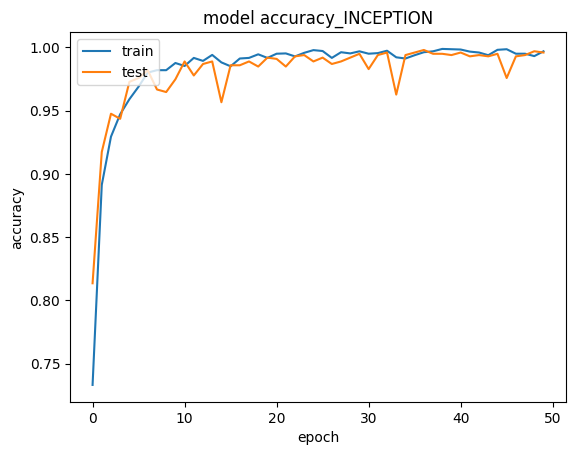

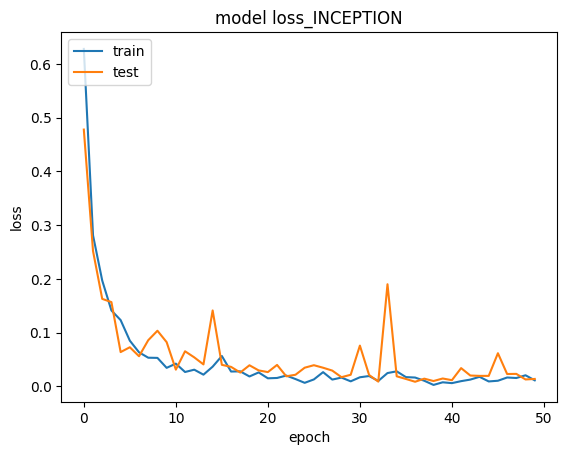

1724.5834512710571


In [ ]:
# importing libraries
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.layers.regularization.dropout import Dropout
from keras.src.layers.reshaping.flatten import Flatten
from keras.src.layers.core.dense import Dense
from keras.src.applications import InceptionV3
from matplotlib import pyplot as plt
import time
import keras

# Using InceptionV3 as base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss ='categorical_crossentropy',optimizer=opt, metrics =['accuracy'])


train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

Val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical', shuffle=False)

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples // batch_size,
                              epochs=epochs, validation_data=validation_generator,
                              validation_steps=nb_validation_samples // batch_size)

model.save_weights('model_INCEPTION.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy_INCEPTION')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_INCEPTION')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['glioma','meningioma','notumor']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-3-b13177245ef6>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[296   4   0]
 [  0 306   0]
 [  0   0 405]]
Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.99      0.99       300
  meningioma       0.99      1.00      0.99       306
     notumor       1.00      1.00      1.00       405

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011



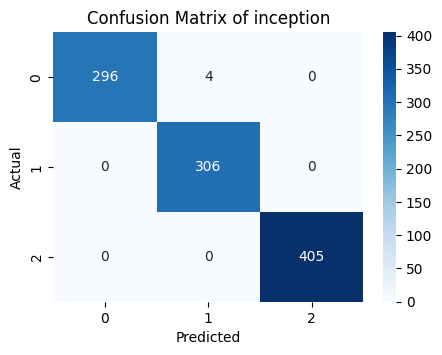

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of inception')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_inception.png')

# Show the plot
plt.show()